In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify


## Load DataFrames

#### Most data wrangling already happened, during extraction from Google Sheets, with names changed in a git ignored piece of code

<center>df = `harvest_party_expenses.csv`</center>

In [2]:
# read in main expenses csv as a df
df = pd.read_csv("./static/resources/harvest_party_expenses.csv")
df.head()

,Name,Expense,Expense Amt,Date bought,Category
0,Randy Detman,Key chains,150,2017,Merch
1,Morning Glory,Liquor / Food / Costco,50,2017,Costco
2,Randy Detman,Cleaning service,60,2017,Cleaning
3,Randy Detman,Carpet cleaner,50,2017,Cleaning
4,Morning Glory,Brau kegs,140,2017,Bar


In [3]:
# convert all 'Expense Amt' to float with regex (remove $ and ,)
df["Expense Amt"] = df["Expense Amt"].replace("[\$,]", "", regex=True).astype(float)

# confirm all of 'Expense Amt' are floats
df.dtypes

Name            object
Expense         object
Expense Amt    float64
Date bought      int64
Category        object
dtype: object

In [4]:
# rename columns
df = df.rename(columns={"Expense Amt": "Amount", "Date bought": "Year"})
df

,Name,Expense,Amount,Year,Category
0,Randy Detman,Key chains,150.0,2017,Merch
1,Morning Glory,Liquor / Food / Costco,50.0,2017,Costco
2,Randy Detman,Cleaning service,60.0,2017,Cleaning
3,Randy Detman,Carpet cleaner,50.0,2017,Cleaning
4,Morning Glory,Brau kegs,140.0,2017,Bar
...,...,...,...,...,...
92,Randy Detman,Logo,200.0,2023,Logo
93,Latvia,Sid's shirts,50.0,2023,Merch
94,Watsonville,Cleaner Uber,20.0,2023,Cleaning
95,Bitter Barbie,New t-shirts advance payment,150.0,2023,Merch


##### Break the Costco Category up. One-third to Food, Two-thirds to Bar.

In [5]:
# Re-categorize Costco, giving 1/3 to Food, 2/3 to Bar
# food
df_food = df[df.Category == "Costco"].copy()
df_food.Amount /= 3
df_food.Category = "Food"
# bar
df_bar = df[df.Category == "Costco"].copy()
df_bar.Amount *= 2 / 3
df_bar.Category = "Bar"

# remove Costco from original df
df = df[df.Category != "Costco"]

# combine all dfs
df = pd.concat([df, df_food, df_bar], ignore_index=True)
df

,Name,Expense,Amount,Year,Category
0,Randy Detman,Key chains,150.000000,2017,Merch
1,Randy Detman,Cleaning service,60.000000,2017,Cleaning
2,Randy Detman,Carpet cleaner,50.000000,2017,Cleaning
3,Morning Glory,Brau kegs,140.000000,2017,Bar
4,Tom Brady,Plates/cups etc,50.000000,2017,Food
...,...,...,...,...,...
99,Morning Glory,"Costco Liquor / Plates / Paper Towels, TP, tra...",133.333333,2019,Bar
100,Randy Detman,Costco part 2,34.240000,2019,Bar
101,Randy Detman,Costco,178.773333,2021,Bar
102,Randy Detman,Costco,282.013333,2022,Bar


<center>po_df = `pay_outs.csv`</center>

In [6]:
# read in pay_outs csv as a df
po_df = pd.read_csv("./static/resources/pay_outs.csv")
po_df.head()

,Year,Name,Paid
0,2017,Randy Detman,646
1,2017,Watsonville,40
2,2017,Morning Glory,190
3,2017,Tom Brady,337
4,2018,Randy Detman,950


In [7]:
# convert all 'Paid' to float with regex (remove $ and ,)
po_df.Paid = po_df.Paid.replace("[\$,]", "", regex=True).astype(float)

# confirm all of 'Paid' are floats
po_df.dtypes

Year      int64
Name     object
Paid    float64
dtype: object

In [8]:
po_df

,Year,Name,Paid
0,2017,Randy Detman,646.00
1,2017,Watsonville,40.00
2,2017,Morning Glory,190.00
3,2017,Tom Brady,337.00
4,2018,Randy Detman,950.00
5,2018,Morning Glory,367.00
6,2018,Tom Brady,567.00
7,2019,Randy Detman,938.98
8,2019,Morning Glory,725.00
9,2019,Tom Brady,700.00


<center>don_df = `donations.csv`</center>

In [9]:
don_df = pd.read_csv("./static/resources/donations.csv")
don_df

,year,donations
0,2023,"$5,095.00"
1,2022,"$5,485.00"
2,2021,"$1,981.00"
3,2019,"$3,242.40"
4,2018,"$1,884.00"
5,2017,"$1,214.00"
6,2016,NaN
7,2015,NaN
8,2014,NaN


In [10]:
# convert all 'donations' to float with regex (remove $ and ,)
don_df.donations = don_df.donations.replace("[\$,]", "", regex=True).astype(float)

# confirm all of 'donations' are floats
don_df.dtypes

year           int64
donations    float64
dtype: object

In [11]:
don_df = don_df.rename(columns={"year": "Year", "donations": "Donations"})
don_df.dropna(inplace=True)
don_df

,Year,Donations
0,2023,5095.0
1,2022,5485.0
2,2021,1981.0
3,2019,3242.4
4,2018,1884.0
5,2017,1214.0


<center>att_df = `attendees.csv`</center>

In [12]:
att_df = pd.read_csv("./static/resources/attendees.csv")
att_df

,year,facebook_going,facebook_maybes
0,2023,97,29
1,2022,100,40
2,2021,95,25
3,2019,194,85
4,2018,136,54
5,2017,156,76
6,2016,59,29
7,2015,127,49
8,2014,40,11


In [13]:
att_df.dtypes

year               int64
facebook_going     int64
facebook_maybes    int64
dtype: object

In [14]:
att_df = att_df.rename(
    columns={"year": "Year", "facebook_going": "Going", "facebook_maybes": "Maybes"}
)
att_df

,Year,Going,Maybes
0,2023,97,29
1,2022,100,40
2,2021,95,25
3,2019,194,85
4,2018,136,54
5,2017,156,76
6,2016,59,29
7,2015,127,49
8,2014,40,11


#### Data wrangling complete

#### ------------

#### Describe the dfs

In [15]:
df.describe()

,Amount,Year
count,104.000000,104.000000
mean,179.052308,2020.250000
std,201.174648,2.171081
min,0.000000,2017.000000
25%,60.000000,2018.750000
50%,105.761667,2021.000000
75%,200.000000,2022.000000
max,950.000000,2023.000000


In [16]:
po_df.describe()

,Year,Paid
count,30.000000,30.000000
mean,2020.200000,586.468667
std,2.203446,488.622280
min,2017.000000,20.000000
25%,2019.000000,180.055000
50%,2019.000000,560.000000
75%,2022.000000,947.245000
max,2023.000000,2002.940000


In [17]:
don_df.describe()

,Year,Donations
count,6.000000,6.000000
mean,2020.000000,3150.233333
std,2.366432,1786.684104
min,2017.000000,1214.000000
25%,2018.250000,1908.250000
50%,2020.000000,2611.700000
75%,2021.750000,4631.850000
max,2023.000000,5485.000000


In [18]:
att_df.describe()

,Year,Going,Maybes
count,9.000000,9.000000,9.000000
mean,2018.333333,111.555556,44.222222
std,3.162278,47.579174,24.355583
min,2014.000000,40.000000,11.000000
25%,2016.000000,95.000000,29.000000
50%,2018.000000,100.000000,40.000000
75%,2021.000000,136.000000,54.000000
max,2023.000000,194.000000,85.000000


## Plots!

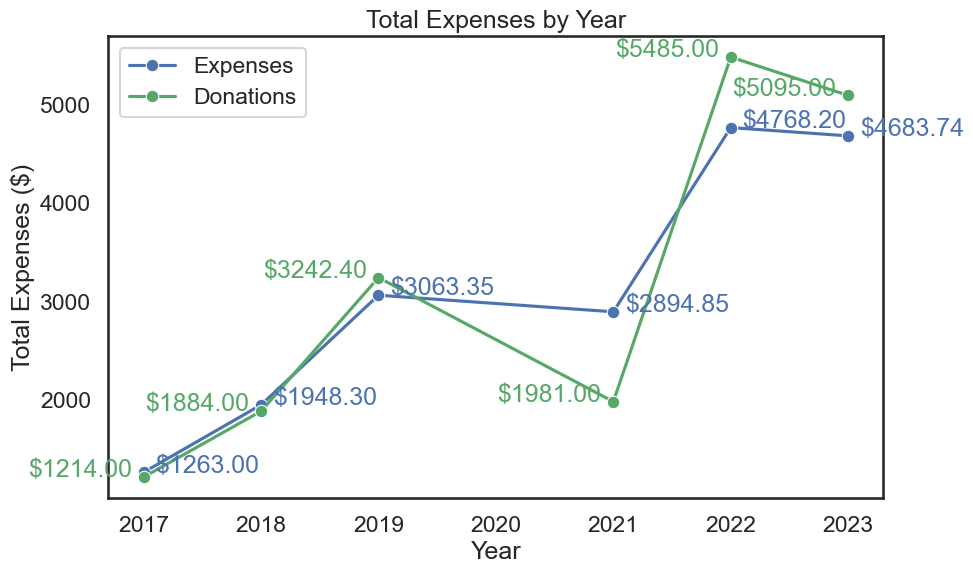

In [19]:
# plot expenses and donations by year as a line chart
sns.set_theme(style="white", font="Arial", context="talk")
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Year", y="Amount", data=df, estimator="sum", errorbar=None, marker="o", color="b"
)
sns.lineplot(x="Year", y="Donations", data=don_df, errorbar=None, marker="o", color="g")

# annotate each data point
df_sum = df.groupby("Year")["Amount"].sum()
for year, amount in df_sum.items():
    plt.text(
        year + 0.1, amount, f"${amount:.2f}", horizontalalignment="left", color="b"
    )
for _, row in don_df.iterrows():
    year = row.Year
    amount = row.Donations
    plt.text(
        year - 0.1, amount, f"${amount:.2f}", horizontalalignment="right", color="g"
    )

# format plot
plt.title("Total Expenses by Year")
plt.xlabel("Year")
plt.ylabel("Total Expenses ($)")
plt.legend(["Expenses", "Donations"])
plt.show()

Before:    Year  Expenses  Donations
0  2017   1263.00     1214.0
1  2018   1948.30     1884.0
2  2019   3063.35     3242.4
3  2021   2894.85     1981.0
4  2022   4768.20     5485.0
5  2023   4683.74     5095.0

After:     Year       Type   Amount
0   2017   Expenses  1263.00
1   2018   Expenses  1948.30
2   2019   Expenses  3063.35
3   2021   Expenses  2894.85
4   2022   Expenses  4768.20
5   2023   Expenses  4683.74
6   2017  Donations  1214.00
7   2018  Donations  1884.00
8   2019  Donations  3242.40
9   2021  Donations  1981.00
10  2022  Donations  5485.00
11  2023  Donations  5095.00


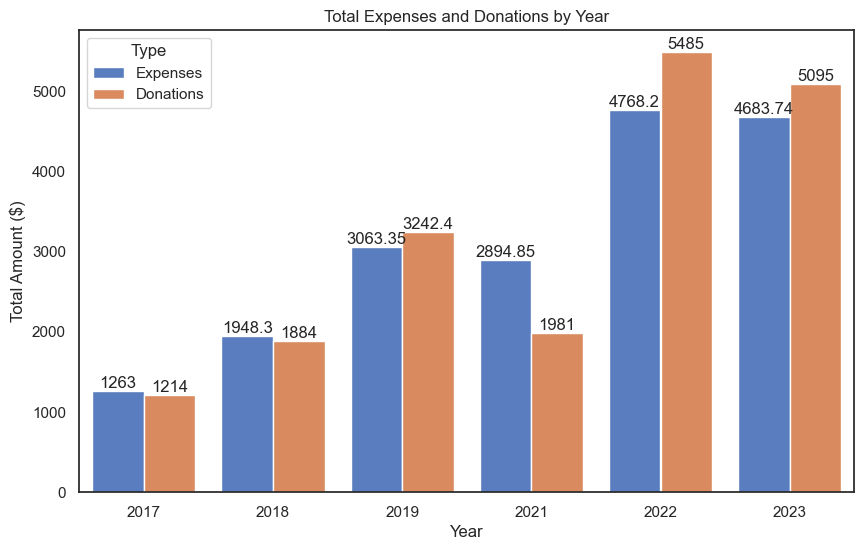

In [20]:
# grouped barchart of expenses and donations by year
df_sum = df.groupby("Year")["Amount"].sum().reset_index()
df_sum.columns = ["Year", "Expenses"]

don_sum = don_df.copy()

# merge expenses and donations dfs
df_sum = pd.merge(df_sum, don_sum, on="Year", how="outer")

# 'unpivot' the df (see print() output for before and after)
print(f"Before: {df_sum}\n")
df_sum_melt = df_sum.melt("Year", var_name="Type", value_name="Amount")
print(f"After: {df_sum_melt}")

# plot grouped barchart
sns.set_theme(style="white", font="Arial")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Year", y="Amount", hue="Type", data=df_sum_melt, palette="muted")

# add labels
for container in ax.containers:
    ax.bar_label(container)

# format plot
plt.title("Total Expenses and Donations by Year")
plt.xlabel("Year")
plt.ylabel("Total Amount ($)")
plt.legend(title="Type")
plt.show()

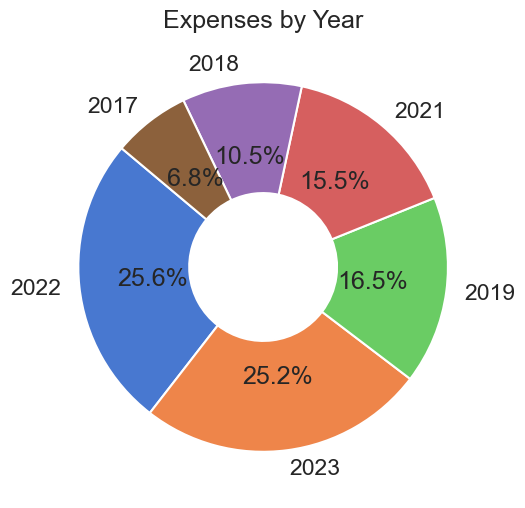

In [21]:
# plot total expenses by year as a donut chart

# group and sort sums by year
df_sum = df.groupby("Year")["Amount"].sum().reset_index()
df_sum = df_sum.sort_values("Amount", ascending=False)

# plot and format donut chart
sns.set_theme(style="white", font="Arial", context="talk")
plt.figure(figsize=(10, 6))
plt.pie(
    df_sum.Amount,
    labels=df_sum.Year,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("muted"),
    wedgeprops=dict(width=0.6, edgecolor="w"),
)
plt.title("Expenses by Year")
plt.show()

<Figure size 1000x600 with 0 Axes>

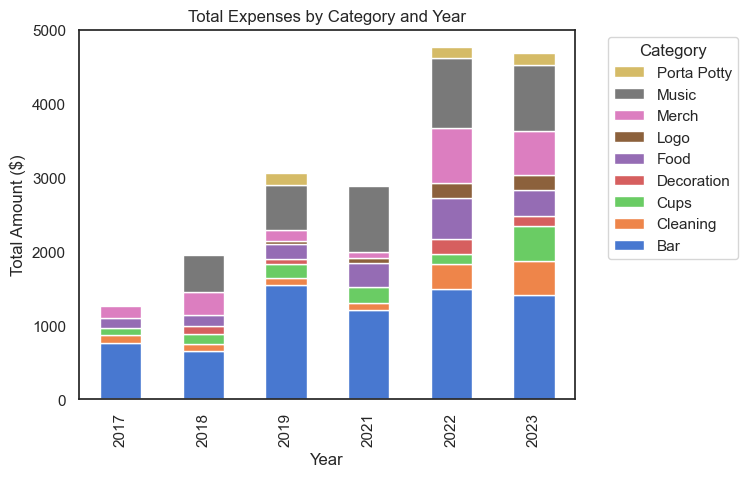

In [22]:
# plot a grouped bar chart of expenses by category, per year
df_cat = df.groupby(["Year", "Category"])["Amount"].sum().reset_index()
df_cat = df_cat.pivot(index="Year", columns="Category", values="Amount").reset_index()
df_cat = df_cat.fillna(0)

# plot the chart
sns.set_theme(style="white", font="Arial")
plt.figure(figsize=(10, 6))
ax = df_cat.plot(x="Year", kind="bar", stacked=True, color=sns.color_palette("muted"))

# format plot
plt.title("Total Expenses by Category and Year")
plt.xlabel("Year")
plt.ylabel("Total Amount ($)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left', reverse = True)
plt.show()

### No Music in 2017...? Sarah!!!!!!

<Figure size 1000x600 with 0 Axes>

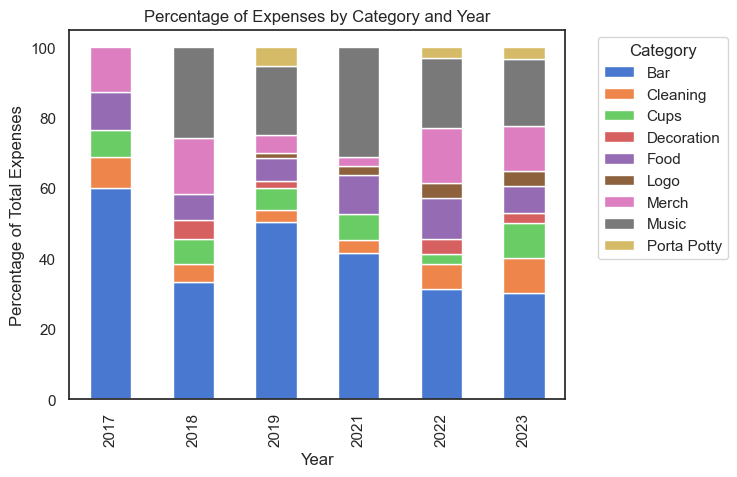

In [23]:
# plot of percentage of expenses by category per year

# group and sort sums by Category and Year
df_cat_year_sum = df.groupby(["Category", "Year"]).sum().reset_index()

# calculate total expenses per year
total_expenses_per_year = df.groupby("Year")["Amount"].sum().reset_index()

# merge total expenses into df_cat_year_sum
df_cat_year_sum = pd.merge(df_cat_year_sum, total_expenses_per_year, on="Year", suffixes=("", "_total"))

# calculate percentage for each category-year combination
df_cat_year_sum['Percentage'] = (df_cat_year_sum['Amount'] / df_cat_year_sum['Amount_total']) * 100

# pivot df so each Category is a column for plotting
df_pivot = df_cat_year_sum.pivot(index="Year", columns="Category", values="Percentage").reset_index()
df_pivot = df_pivot.fillna(0)

# plot the chart
sns.set_theme(style="white", font="Arial")
plt.figure(figsize=(10, 6))
ax = df_pivot.plot(x="Year", kind="bar", stacked=True, color=sns.color_palette("muted"))

# format plot
plt.title("Percentage of Expenses by Category and Year")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Expenses")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [24]:
# plot of percentage of expenses by category per year

# group and sort sums by Category and Year
df_cat_year_sum = df.groupby(["Category", "Year"]).sum().reset_index()

# calculate total expenses per year
total_expenses_per_year = df.groupby("Year")["Amount"].sum().reset_index()

# merge total expenses into df_cat_year_sum
df_cat_year_sum = pd.merge(df_cat_year_sum, total_expenses_per_year, on="Year", suffixes=("", "_total"))

# calculate percentage for each category-year combination
df_cat_year_sum['Percentage'] = (df_cat_year_sum['Amount'] / df_cat_year_sum['Amount_total']) * 100

# plot the chart
fig = px.bar(df_cat_year_sum, x="Year", y="Percentage", color="Category",
             labels={"Percentage": "Percentage of Total Expenses", "Year": "Year"},
             title="Percentage of Expenses by Category and Year",
             hover_data=["Category", "Percentage"],
             category_orders={"Category": sorted(df['Category'].unique())})

fig.show()


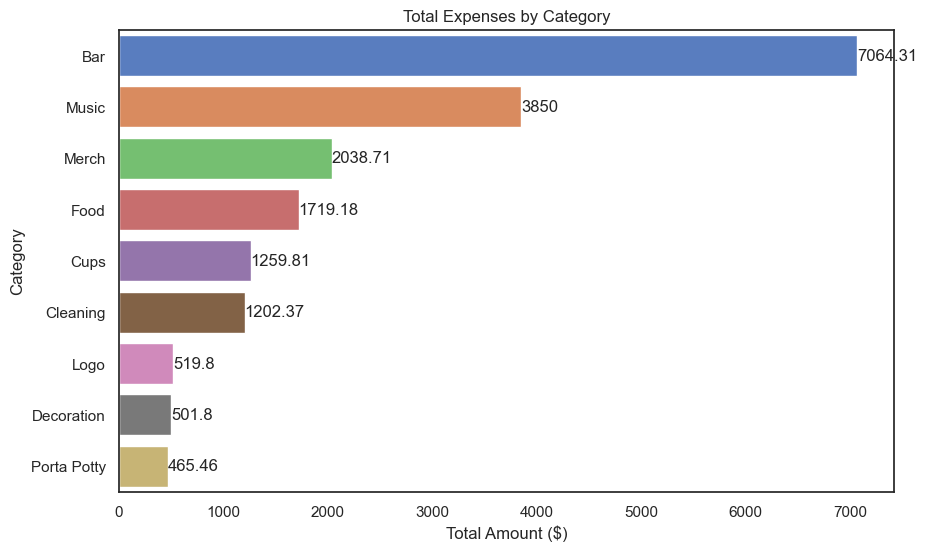

In [25]:
# plot a bar chart of total expenses by category

# group and sort Amount by Category
df_cat_sum = df.groupby("Category")["Amount"].sum().reset_index()
df_cat_sum = df_cat_sum.sort_values("Amount", ascending=False)

# plot the chart
sns.set_theme(style="white", font="Arial")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Amount", y="Category", data=df_cat_sum, palette="muted")

# add labels
for container in ax.containers:
    ax.bar_label(container)

# format plot
plt.title("Total Expenses by Category")
plt.xlabel("Total Amount ($)")
plt.ylabel("Category")
plt.show()

In [26]:
print(f"Total Spent over all years: ${df.Amount.sum():.2f}")

Total Spent over all years: $18621.44


In [27]:
# treemap of total expenses by category

# group and sort sums by category
df_cat_sum = df.groupby("Category")["Amount"].sum().reset_index()
df_cat_sum = df_cat_sum.sort_values("Amount", ascending=False)

# plot chart
fig = px.treemap(df_cat_sum, path=['Category'], values='Amount',
                 title='Total Expenses by Category')

# update layout for better display
fig.update_layout(
    height=600,
    width=800,
    uniformtext=dict(minsize=12, mode='hide'),
)

fig.show()

In [28]:
# treemap with percentages

# group and sort sums by category
df_cat_sum = df.groupby("Category")["Amount"].sum().reset_index()
df_cat_sum = df_cat_sum.sort_values("Amount", ascending=False)

# calculate percentage
total = df_cat_sum["Amount"].sum()
df_cat_sum["Percentage"] = df_cat_sum["Amount"].apply(lambda x: x / total * 100)

# labels with percentage
df_cat_sum["Label"] = df_cat_sum["Category"] + " (" + df_cat_sum["Percentage"].round(2).astype(str) + "%)"

# plot chart
fig = px.treemap(df_cat_sum, path=['Label'], values='Amount',
                 title='Total Expenses by Category')

# update layout for better display
fig.update_layout(
    height=600,
    width=800,
    uniformtext=dict(minsize=12, mode='hide'),
)

fig.show()

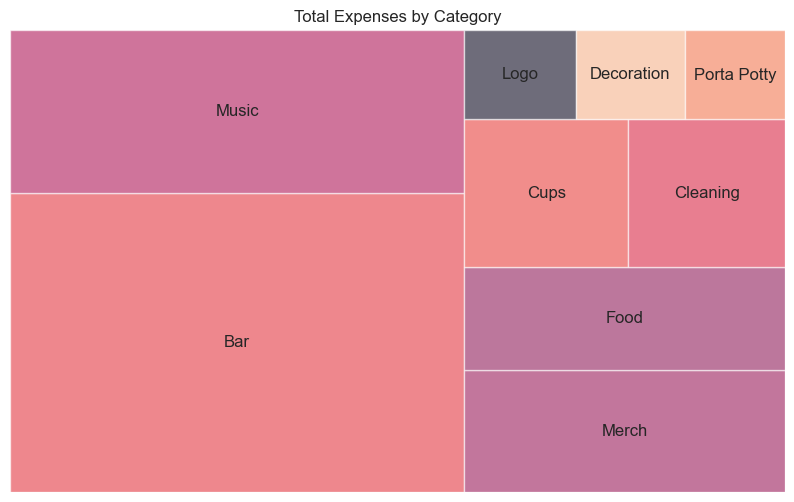

In [29]:
# alternate treemap using squarify

# group and sort sums by category
df_cat_sum = df.groupby("Category")["Amount"].sum().reset_index()
df_cat_sum = df_cat_sum.sort_values("Amount", ascending=False)

# calculate relative sizes of rectangles
sizes = df_cat_sum["Amount"] / df_cat_sum["Amount"].sum()

# plot chart
sns.set_theme(style="white", font="Arial")
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=df_cat_sum["Category"], alpha=0.6)

# format plot
plt.title("Total Expenses by Category")
plt.axis('off')  # Turn off the axis
plt.show()

In [30]:
# treemap of expenses by category and year

# group and sort sums by Category and Year
df_cat_year_sum = df.groupby(["Category", "Year"]).sum().reset_index()

# calculate percentage of total expenses for each category-year combination
df_cat_year_sum['Percentage'] = df_cat_year_sum.groupby('Category')['Amount'].transform(lambda x: x / x.sum() * 100)

# plot the chart
fig = px.treemap(df_cat_year_sum,
                 path=['Year', 'Category'],
                 values='Percentage',
                 color='Year',
                 color_continuous_scale='Viridis',
                 title="Treemap Chart of Expenses by Category and Year")

# update layout for better display
fig.update_layout(
    height=600,
    width=800,
    uniformtext=dict(minsize=12, mode='hide'),
)

fig.show()


Before: 
    Year     Category       Amount
0   2017          Bar   757.666667
1   2017     Cleaning   110.000000
2   2017         Cups   100.000000
3   2017         Food   135.333333
4   2017        Merch   160.000000
5   2018          Bar   649.000000
6   2018     Cleaning   100.000000
7   2018         Cups   140.580000
8   2018   Decoration   100.000000
9   2018         Food   145.000000
10  2018        Merch   313.720000
11  2018        Music   500.000000
12  2019          Bar  1542.943333
13  2019     Cleaning   100.000000
14  2019         Cups   195.520000
15  2019   Decoration    60.000000
16  2019         Food   197.786667
17  2019         Logo    45.000000
18  2019        Merch   156.640000
19  2019        Music   600.000000
20  2019  Porta Potty   165.460000
21  2021          Bar  1206.153333
22  2021     Cleaning   100.000000
23  2021         Cups   214.120000
24  2021         Food   323.386667
25  2021         Logo    74.800000
26  2021        Merch    76.390000
27  2021   

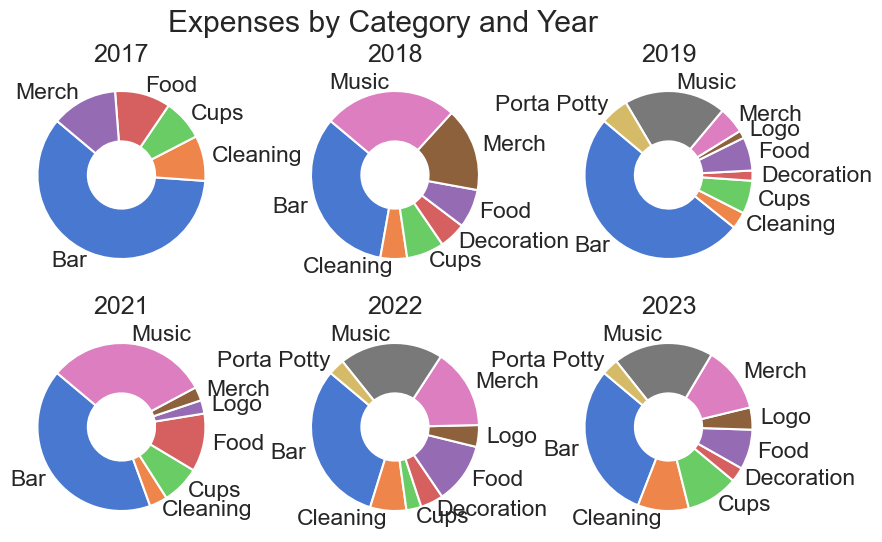

In [31]:
# plot every year's expenses by category as a donut chart

# group and sort sums by year
df_cat = df.groupby(["Year", "Category"])["Amount"].sum().reset_index()
print(f"Before: \n{df_cat}\n")
# pivot df so each Category is a column - before & after below (click view as a scrollable element)
df_cat = df_cat.pivot(index="Year", columns="Category", values="Amount").reset_index()
df_cat = df_cat.fillna(0)
print(f"After: \n{df_cat}")

# format overall figure
sns.set_theme(style="white", font="Arial", context="talk")
plt.figure(figsize=(10, 6))

for i, year in enumerate(df_cat.Year):
    # create a new subplot for each year
    plt.subplot(2, 3, i + 1)
    # Get values and labels, and filter out values that are zero
    values = df_cat.iloc[i, 1:]
    labels = df_cat.columns[1:]
    values, labels = values[values != 0], labels[values != 0]

    # plot the donut chart with filtered values and labels
    plt.pie(
        values,
        labels=labels,
        startangle=140,
        colors=sns.color_palette("muted"),
        wedgeprops=dict(width=0.6, edgecolor="w"),
    )
    plt.title(year)

# format overall figure
plt.suptitle("Expenses by Category and Year")
plt.show()

C:\Users\johbr\AppData\Local\Temp\ipykernel_1020\3806013762.py:15: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



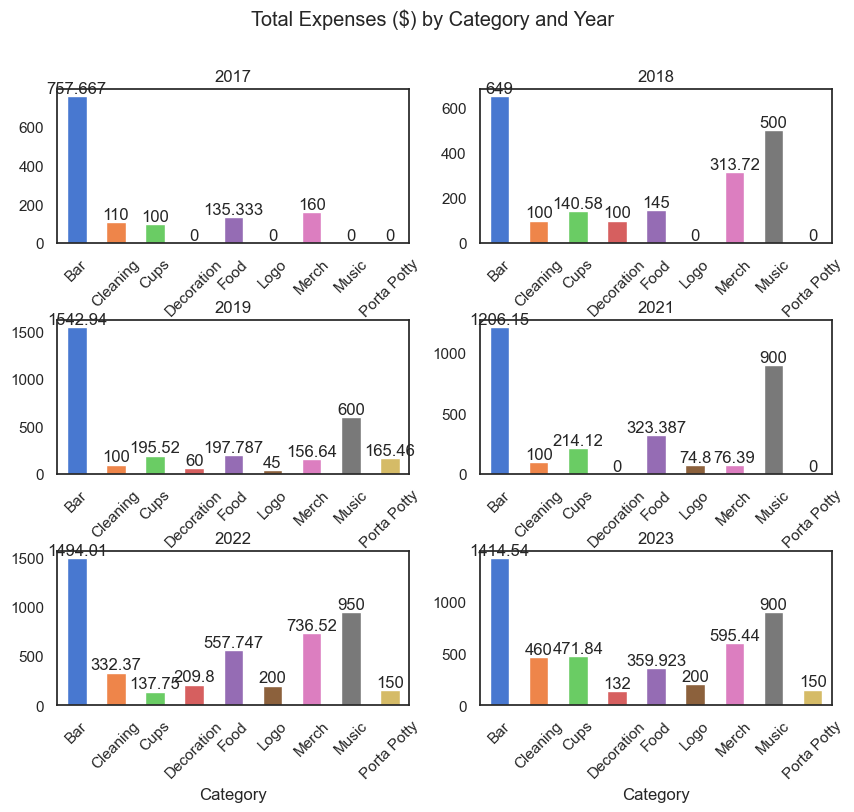

In [32]:
# plot a bar chart of every year's expenses by category

# group and sort sums by year
df_cat = df.groupby(["Year", "Category"])["Amount"].sum().reset_index()
# pivot df so each Category is a column
df_cat = df_cat.pivot(index="Year", columns="Category", values="Amount").reset_index()

# format overall figure
sns.set_theme(style="white", font="Arial")
plt.figure(figsize=(10, 8))
plt.ylabel("Total Amount ($)")

for i, year in enumerate(df_cat.Year):
    # create a new subplot for each year
    plt.subplot(3, 2, i + 1)
    # plot the bar chart
    # df_cat from pie charts immediately prior is reused here
    ax = df_cat.iloc[i, 1:].plot(kind="bar", color=sns.color_palette("muted"))

    # add labels
    for container in ax.containers:
        ax.bar_label(container)

    # format plot
    plt.title(year)
    # plt.xlabel('Category')
    # plt.ylabel('Total Amount ($)')
    plt.xticks(rotation=45)

# adjust space between subplots
plt.subplots_adjust(hspace=.5)

# format overall figure
plt.suptitle("Total Expenses ($) by Category and Year")
plt.xlabel("Category")
# plt.ylabel('Total Amount ($)')
plt.show()

C:\Users\johbr\AppData\Local\Temp\ipykernel_1020\1682894462.py:16: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



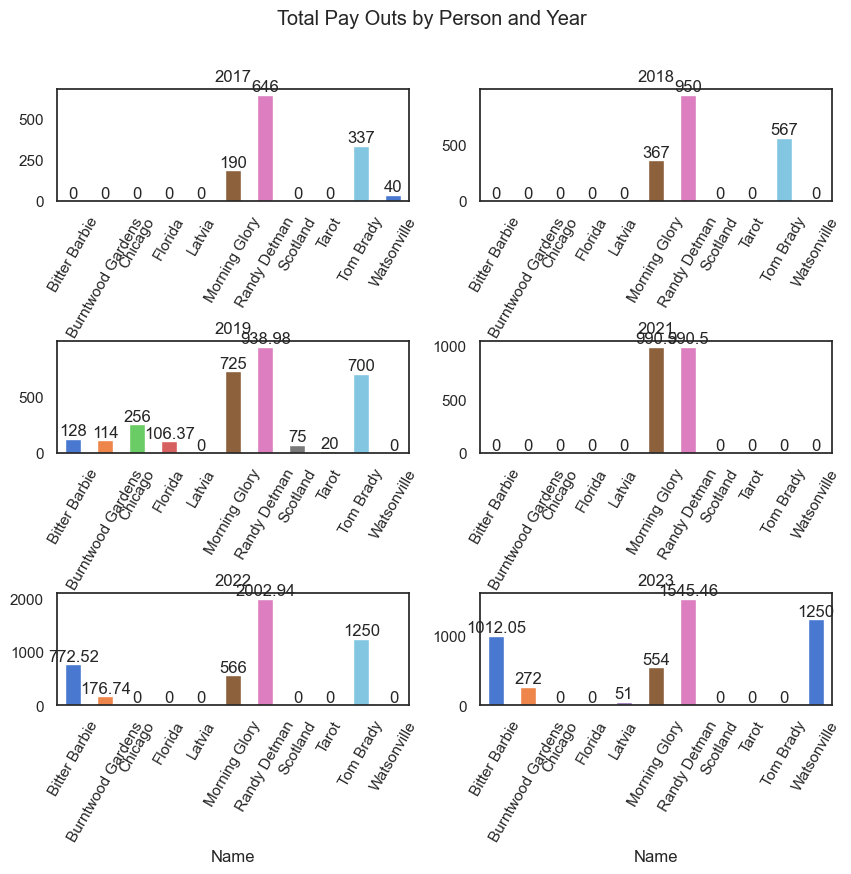

In [33]:
# plot a bar chart of every person's total pay_outs by year

# group and sort sums by year
po_sum = po_df.groupby(["Year", "Name"])["Paid"].sum().reset_index()
po_sum = po_sum.pivot(index="Year", columns="Name", values="Paid").reset_index()
po_sum = po_sum.fillna(0)

# format overall figure
sns.set_theme(style="white", font="Arial")
plt.figure(figsize=(10, 8))
plt.ylabel("Total Amount ($)")
plt.xlabel("Year")

for i, year in enumerate(po_sum.Year):
    # create a new subplot for each year
    plt.subplot(3, 2, i + 1)
    # plot the bar chart
    ax = po_sum.iloc[i, 1:].plot(kind="bar", color=sns.color_palette("muted"))

    # add labels
    for container in ax.containers:
        ax.bar_label(container)

    # format plot
    plt.title(year)
    plt.xticks(rotation=60)

# adjust space between subplots
plt.subplots_adjust(hspace=1.25)

# format overall figure
plt.suptitle("Total Pay Outs by Person and Year")
plt.show()

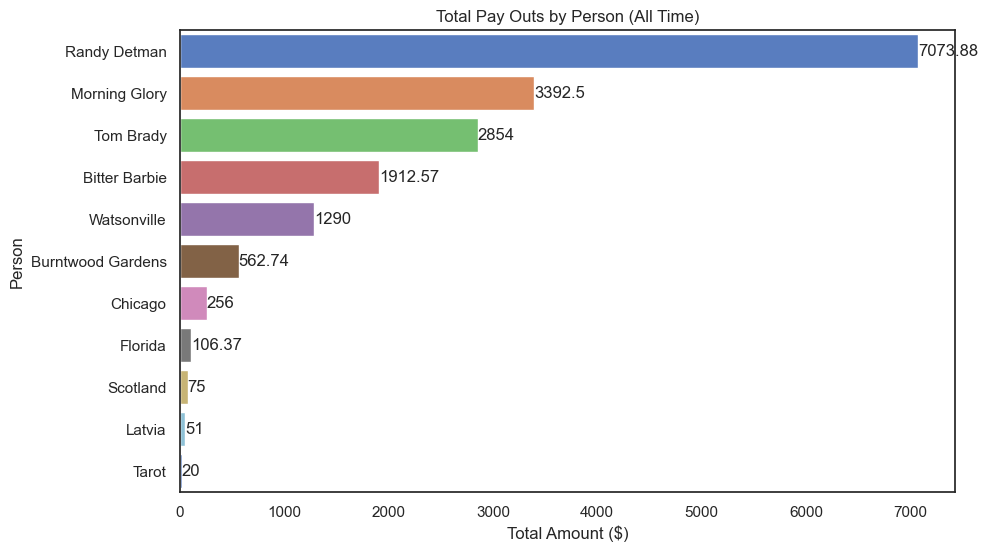

In [34]:
# plot bar chart of every person's total pay_outs

# group and sort sums by year
po_sum = po_df.groupby("Name")["Paid"].sum().reset_index()
po_sum = po_sum.sort_values("Paid", ascending=False)

# plot the chart
sns.set_theme(style="white", font="Arial")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Paid", y="Name", data=po_sum, palette="muted")

# add labels
for container in ax.containers:
    ax.bar_label(container)

# format plot
plt.title("Total Pay Outs by Person (All Time)")
plt.xlabel("Total Amount ($)")
plt.ylabel("Person")
plt.show()

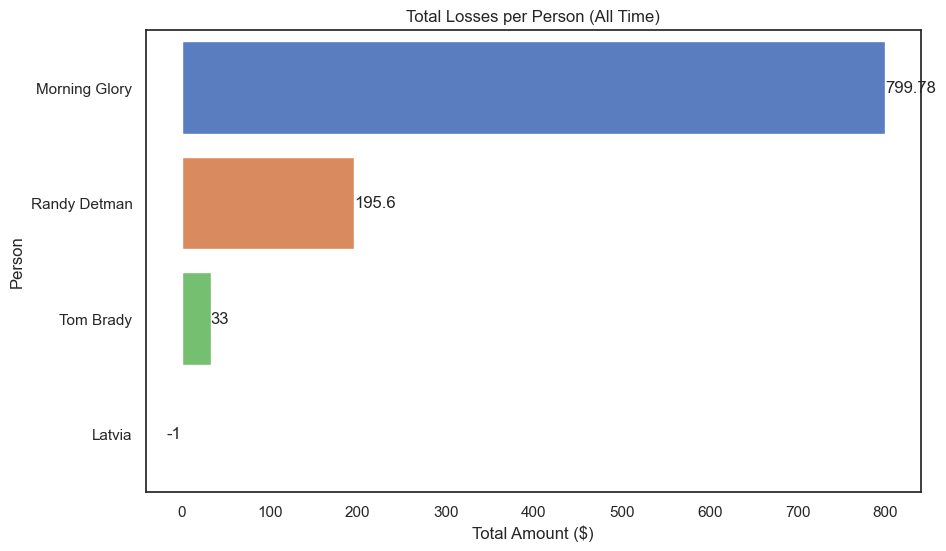

In [35]:
# plot total losses per person, ignore nulls, losses are total expenses minus pay_outs

# group and sort sums by year
po_sum = po_df.groupby("Name")["Paid"].sum().reset_index()
po_sum = po_sum.sort_values("Paid", ascending=False)

# group and sort sums by year
df_sum = df.groupby("Name")["Amount"].sum().reset_index()
df_sum = df_sum.sort_values("Amount", ascending=False)

# merge dfs
losses = pd.merge(df_sum, po_sum, on="Name", how="outer")
losses = losses.fillna(0)
losses["Losses"] = losses.Amount - losses.Paid
losses = losses.sort_values("Losses", ascending=False)

# Filter out people with zero losses
losses = losses[losses.Losses != 0]

# plot the chart
sns.set_theme(style="white", font="Arial")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Losses", y="Name", data=losses, palette="muted")

# add labels
for container in ax.containers:
    ax.bar_label(container)

# format plot
plt.title("Total Losses per Person (All Time)")
plt.xlabel("Total Amount ($)")
plt.ylabel("Person")
plt.show()

In [36]:
print(f"Total Spent over all years (per df): ${df.Amount.sum():.2f}")
print(f"Total Spent over all years (per df_sum): ${df_sum.Amount.sum():.2f}")
print(f"Total Paid out over all years: ${po_df.Paid.sum():.2f}")

Total Spent over all years (per df): $18621.44
Total Spent over all years (per df_sum): $18621.44
Total Paid out over all years: $17594.06
